# UBC Bolt First Byte 2025

#### Mission:

- As audiences shift online, new technologies arise, and competing clubs expand their global footprint, Vancouver City must decide how to evolve and where to invest, in order to secure its future on and off the pitch.
- The club’s mission is to grow the game, empower fans, and strengthen connections between players, supporters, and the city it represents.

#### Context

- sales have continued to decline. Overall earnings have fallen from roughly $60 million in prior years to materially lower levels today
- The club’s three primary sources of revenue, including stadium operations, merchandise sales, and fanbase engagement, have all been impacted by these issues. Matchday turnout and in-stadium spending are falling, online sales are down by 30% compared to prior seasons, and global engagement remains underdeveloped

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [7]:
merch_dat = pd.read_excel(r"data\BOLT UBC First Byte - Merchandise Sales.xlsx")
stadium_dat = pd.read_excel(r"data\BOLT UBC First Byte - Stadium Operations.xlsx")
fan_dat = pd.read_excel(r"data\BOLT UBC First Byte - Fanbase Engagement.xlsx")

In [8]:
merch_dat.sample(5)

,Product_ID,Barcode,Item_Category,Item_Name,Size,Unit_Price,Customer_Age_Group,Customer_Region,Promotion,Channel,Selling_Date,Member_ID,Arrival_Date
34848,10000004,20034848,Jersey,Away Jersey,L,152,<18,International,False,Online,2024-05-28 13:03:00,10028868,2024-06-05 11:48:00
50772,10000006,20050772,Jersey,Retro Jersey,M,152,26–40,Domestic,True,Online,2024-02-02 06:55:00,10005835,2024-02-11 15:07:00
5166,10000008,20005166,Mug,Logo Mug,NaN,25,60+,Domestic,True,Online,2024-04-30 06:35:00,10026024,2024-05-06 14:44:00
14236,10000008,20014236,Mug,Logo Mug,NaN,25,18–25,Domestic,False,Online,2024-01-22 08:21:00,10003238,2024-01-31 11:00:00
34101,10000004,20034101,Jersey,Away Jersey,M,152,26–40,Domestic,False,Online,2024-01-30 15:29:00,10005211,2024-02-07 18:42:00


In [9]:
stadium_dat.sample(5)

,Month,Source,Revenue
129,10,Utilities,-234718
72,1,Concert,450000
46,11,Premium,19965
128,9,Utilities,-221451
127,8,Utilities,-315497


In [10]:
fan_dat.sample(5)

,Membership_ID,Age_Group,Games_Attended,Seasonal_Pass,Customer_Region
23404,81409167,26-40,19,True,Canada
10366,94079184,60+,6,False,Canada
5157,10042126,60+,6,False,Canada
51999,10001423,26-40,8,False,Canada
25192,10033552,41-60,7,False,USA


## Summary Statistics and Basic Info

In [13]:
merch_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67877 entries, 0 to 67876
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product_ID          67877 non-null  int64         
 1   Barcode             67877 non-null  int64         
 2   Item_Category       67877 non-null  object        
 3   Item_Name           67877 non-null  object        
 4   Size                52041 non-null  object        
 5   Unit_Price          67877 non-null  int64         
 6   Customer_Age_Group  67877 non-null  object        
 7   Customer_Region     67877 non-null  object        
 8   Promotion           67877 non-null  bool          
 9   Channel             67877 non-null  object        
 10  Selling_Date        67877 non-null  datetime64[ns]
 11  Member_ID           67877 non-null  int64         
 12  Arrival_Date        54302 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), int64(4), objec

In [14]:
stadium_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    144 non-null    int64 
 1   Source   144 non-null    object
 2   Revenue  144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [15]:
fan_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Membership_ID    70000 non-null  int64 
 1   Age_Group        70000 non-null  object
 2   Games_Attended   70000 non-null  int64 
 3   Seasonal_Pass    70000 non-null  bool  
 4   Customer_Region  70000 non-null  object
dtypes: bool(1), int64(2), object(2)
memory usage: 2.2+ MB


In [16]:
merch_dat.shape

(67877, 13)

In [17]:
stadium_dat.shape

(144, 3)

In [18]:
fan_dat.shape

(70000, 5)

In [19]:
merch_dat.describe()

,Product_ID,Barcode,Unit_Price,Member_ID
count,6.787700e+04,6.787700e+04,67877.000000,6.787700e+04
mean,1.000001e+07,2.003394e+07,95.129882,1.002226e+07
std,4.603017e+00,1.959455e+04,49.893563,1.284130e+04
min,1.000000e+07,2.000000e+07,20.000000,1.000000e+07
25%,1.000000e+07,2.001697e+07,50.000000,1.001115e+07
50%,1.000000e+07,2.003394e+07,75.000000,1.002229e+07
75%,1.000001e+07,2.005091e+07,152.000000,1.003338e+07
max,1.000002e+07,2.006788e+07,152.000000,1.004452e+07


In [20]:
stadium_dat.describe()

,Month,Revenue
count,144.000000,1.440000e+02
mean,6.500000,9.189942e+04
std,3.464102,1.341148e+06
min,1.000000,-3.527500e+06
25%,3.750000,-1.751925e+05
50%,6.500000,1.420000e+05
75%,9.250000,4.378755e+05
max,12.000000,3.410190e+06


In [21]:
fan_dat.describe()

,Membership_ID,Games_Attended
count,7.000000e+04,70000.000000
mean,2.464124e+07,5.711414
std,2.595011e+07,5.168150
min,1.370000e+03,1.000000
25%,1.001510e+07,3.000000
50%,1.003260e+07,5.000000
75%,3.167822e+07,7.000000
max,9.999924e+07,30.000000


### Missing Values

In [26]:
merch_dat.isna().sum()

Product_ID                0
Barcode                   0
Item_Category             0
Item_Name                 0
Size                  15836
Unit_Price                0
Customer_Age_Group        0
Customer_Region           0
Promotion                 0
Channel                   0
Selling_Date              0
Member_ID                 0
Arrival_Date          13575
dtype: int64

In [27]:
stadium_dat.isna().sum()

Month      0
Source     0
Revenue    0
dtype: int64

In [28]:
fan_dat.isna().sum()

Membership_ID      0
Age_Group          0
Games_Attended     0
Seasonal_Pass      0
Customer_Region    0
dtype: int64

`Size`, `Arrival_Date` has Missing values, we can explore this later

### Duplicate Values

In [30]:
merch_dat.duplicated().sum()

0

In [31]:
stadium_dat.duplicated().sum()

0

In [32]:
fan_dat.duplicated().sum()

0

## Simple Visualizations

Text(0.5, 1.0, 'Distribution of Merchandise Prices')

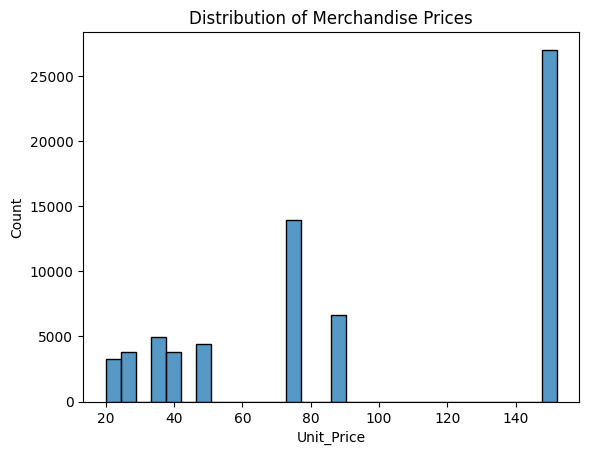

In [35]:
sns.histplot(merch_dat['Unit_Price'], bins=30)
plt.title("Distribution of Merchandise Prices")

<Axes: title={'center': 'Top-Selling Categories'}, ylabel='Item_Category'>

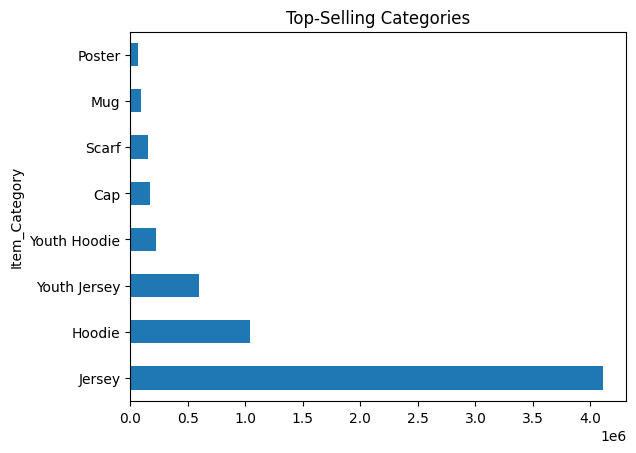

In [36]:
sales_by_cat = merch_dat.groupby('Item_Category')['Unit_Price'].sum().sort_values(ascending=False)
sales_by_cat.head(10).plot(kind='barh', title='Top-Selling Categories')

Text(0.5, 1.0, 'Daily Sales Trend')

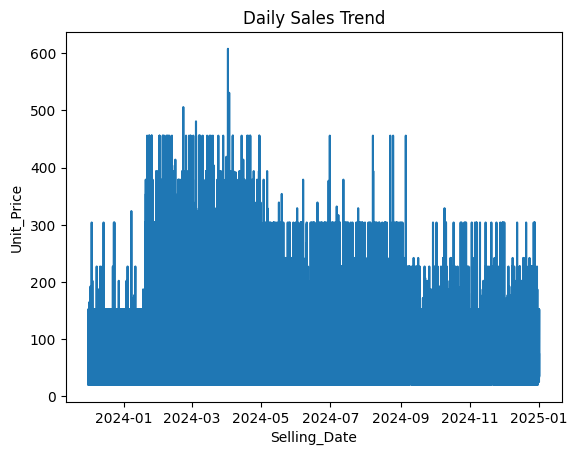

In [37]:
sales_by_day = merch_dat.groupby('Selling_Date')['Unit_Price'].sum().reset_index()
sns.lineplot(x='Selling_Date', y='Unit_Price', data=sales_by_day)
plt.title('Daily Sales Trend')

<Axes: xlabel='Promotion', ylabel='Unit_Price'>

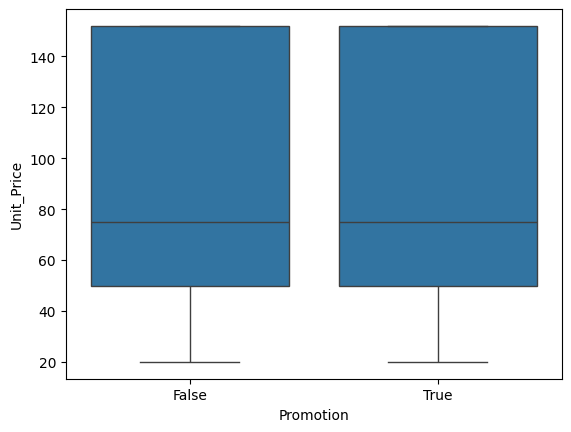

In [39]:
sns.boxplot(x='Promotion', y='Unit_Price', data=merch_dat)

<Axes: xlabel='Channel', ylabel='Unit_Price'>

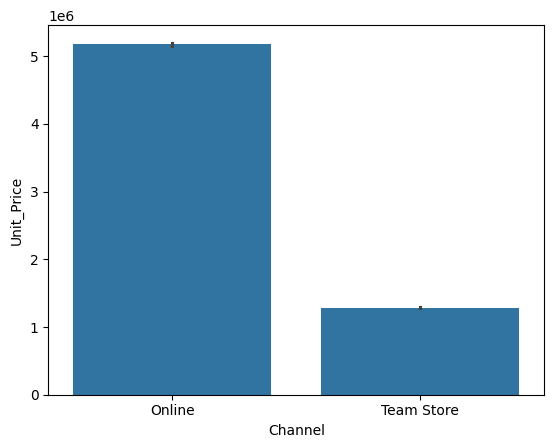

In [41]:
sns.barplot(x='Channel', y='Unit_Price', data=merch_dat, estimator='sum')